Import library

In [91]:
import pandas as pd
import time

In [92]:
df = pd.read_csv("dataset/online-retail.csv")

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15015 entries, 0 to 15014
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ReceiptNo    15015 non-null  object 
 1   ItemCode     15015 non-null  object 
 2   Description  14955 non-null  object 
 3   Quantity     15015 non-null  int64  
 4   InvoiceDate  15015 non-null  object 
 5   UnitPrice    15015 non-null  float64
 6   CustomerID   10744 non-null  float64
 7   Country      15015 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 938.6+ KB


Convert data

In [94]:
# Loại bỏ các dòng trong cột Quantity 
# có giá trị nhỏ hơn hoặc bằng 0
df = df[df['Quantity'] > 0]

# Loại bỏ các dòng và chỉ lấy những 
# dòng có cột Country có giá trị là United Kingdom
country = "United Kingdom"

df = df[df['Country'] == country]
print(df.shape) # in ra số dòng và số cột của dataframe

# Gom nhóm các mã sản phẩm (ItemCode) theo hóa đơn (ReceiptNo)
matrix = df.groupby("ReceiptNo")["ItemCode"].apply(list).tolist()

# Chuyển đổi dữ liệu thành dạng danh sách các giao dịch và 
# loại bỏ các mã sản phẩm trùng lặp trong mỗi giao dịch
transactions = [list(set(x)) for x in matrix]

(14047, 8)


Tính độ support

In [95]:
# tính toán support của một tập phổ biến
def calculate_support(itemset, transactions): 
    count = 0
    for transaction in transactions:
        if set(itemset).issubset(set(transaction)):
            count += 1
    return count / len(transactions) 

Tạo các tập phổ biến mới

In [96]:
def generate_candidates(frequent_itemsets, k):
    # Tạo các tổ hợp mới dựa trên các tập hợp phổ biến trước đó
    candidates = set()
    for i in range(len(frequent_itemsets)):
        for j in range(i+1, len(frequent_itemsets)):
            union_set = frequent_itemsets[i].union(frequent_itemsets[j])
            if len(union_set) == k:
                candidates.add(frozenset(union_set))
    return list(candidates)

Apriori Function

In [97]:
def apriori(transactions, minsup):
    # Tính các tập hợp mục chỉ có 1 phần tử
    single_items = set(item for transaction in transactions for item in transaction)

    # Tìm các tập mục phổ biến có 1 phần tử với support >= minsup
    current_frequent_itemsets = [frozenset([item]) \
        for item in single_items if calculate_support([item], transactions) >= minsup]

    # Tạo một dictionary để lưu trữ support của các tập mục phổ biến
    frequent_itemset_supports = \
    {frozenset([item]): calculate_support([item], transactions) \
        for item in single_items if calculate_support([item], transactions) >= minsup}

    k = 2
    
    # Lặp lại đến khi không còn tập mục phổ biến
    while current_frequent_itemsets:
        # Sinh ra các tập mục có k phần tử từ các tập phổ biến trước đó
        candidates = generate_candidates(current_frequent_itemsets, k)

        # Làm mới tập mục phổ biến
        current_frequent_itemsets = [candidate for candidate in candidates \
            if calculate_support(candidate, transactions) >= minsup]

        # Cập nhật tập mục phổ biến và support của nó
        for itemset in current_frequent_itemsets:
            frequent_itemset_supports[itemset] = calculate_support(itemset, transactions)

        k += 1
    
    return frequent_itemset_supports

Main

In [98]:
start = time.time()

minsup = 0.03
itemset_supports = apriori(transactions, minsup)
    
end = time.time()

## mlxtend library

In [99]:
from mlxtend.frequent_patterns import apriori
# TransactionEncoder chuyển đổi dữ liệu transactions thành định dạng phù hợp
from mlxtend.preprocessing import TransactionEncoder

In [100]:
te = TransactionEncoder() # Khởi tạo một đối tượng TransactionEncoder
te_ary = te.fit(transactions).transform(transactions) # Chuyển đổi dữ liệu thành mảng 2 chiều True/False
df = pd.DataFrame(te_ary, columns=te.columns_) # Chuyển đổi mảng 2 chiều thành DataFrame

In [101]:
df

,10002,10120,10123C,10124A,10124G,10125,10133,10135,11001,15034,...,90214L,90214M,90214N,90214R,90214S,90214V,90214Y,BANK CHARGES,DOT,M
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
561,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
563,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
library_start = time.time()

# Áp dụng thuật toán Apriori với minsup
frequent_itemsets = apriori(df, min_support=minsup, use_colnames=True)

library_end = time.time()

In [103]:
# Hiển thị các tập hợp mục phổ biến cùng với support của chúng
print("Các tập hợp mục phổ biến của code tự triển khai ở", country)
for itemset, support in itemset_supports.items():
    print(f"Tập hợp mục: {list(itemset)} | Support: {round(support,6)}")

Các tập hợp mục phổ biến của code tự triển khai ở United Kingdom
Tập hợp mục: ['84347'] | Support: 0.044248
Tập hợp mục: ['21484'] | Support: 0.044248
Tập hợp mục: ['22141'] | Support: 0.047788
Tập hợp mục: ['20728'] | Support: 0.031858
Tập hợp mục: ['21731'] | Support: 0.033628
Tập hợp mục: ['22940'] | Support: 0.053097
Tập hợp mục: ['84879'] | Support: 0.083186
Tập hợp mục: ['21914'] | Support: 0.035398
Tập hợp mục: ['20975'] | Support: 0.049558
Tập hợp mục: ['22738'] | Support: 0.035398
Tập hợp mục: ['22909'] | Support: 0.056637
Tập hợp mục: ['84029E'] | Support: 0.104425
Tập hợp mục: ['22834'] | Support: 0.061947
Tập hợp mục: ['22086'] | Support: 0.129204
Tập hợp mục: ['21481'] | Support: 0.058407
Tập hợp mục: ['22968'] | Support: 0.030088
Tập hợp mục: ['79321'] | Support: 0.046018
Tập hợp mục: ['21843'] | Support: 0.037168
Tập hợp mục: ['22659'] | Support: 0.047788
Tập hợp mục: ['82482'] | Support: 0.047788
Tập hợp mục: ['22423'] | Support: 0.100885
Tập hợp mục: ['22113'] | Suppor

In [104]:
print("\nCác tập hợp mục phổ biến củ code thư viện ở",country)
print(frequent_itemsets)


Các tập hợp mục phổ biến củ code thư viện ở United Kingdom
      support                                       itemsets
0    0.037168                                        (20685)
1    0.040708                                        (20725)
2    0.033628                                        (20726)
3    0.040708                                        (20727)
4    0.031858                                        (20728)
..        ...                                            ...
475  0.030088         (84029G, 84029E, 37370, 71053, 85123A)
476  0.030088   (84029G, 21068, 37370, 71053, 21071, 85123A)
477  0.030088   (84029G, 85123A, 37370, 71053, 21071, 21871)
478  0.030088  (84029E, 84029G, 85123A, 37370, 21071, 21871)
479  0.030088  (84029E, 84029G, 37370, 71053, 21071, 85123A)

[480 rows x 2 columns]


Accuracy

In [105]:
# Tính toán độ chính xác của thuật toán tự triển khai dựa trên kết quả của thư viện MLxtend
count = 0
for itemset in itemset_supports:
    if itemset in frequent_itemsets['itemsets'].values:
        count += 1
accuracy = count / len(frequent_itemsets)

print(f"\nĐộ chính xác của thuật toán tự triển khai so với thư viện: {accuracy*100:.2f}%")


Độ chính xác của thuật toán tự triển khai so với thư viện: 100.00%


### so sánh code của thư viện và code tự triển khai

In [106]:
# Số lượng tập mục phổ biến
print("Số lượng tập phổ biến của code triển khai:", len(itemset_supports))

# Số lượng tập mục phổ biến
print("Số lượng tập phổ biến của code thư viện:", len(frequent_itemsets))

Số lượng tập phổ biến của code triển khai: 480
Số lượng tập phổ biến của code thư viện: 480


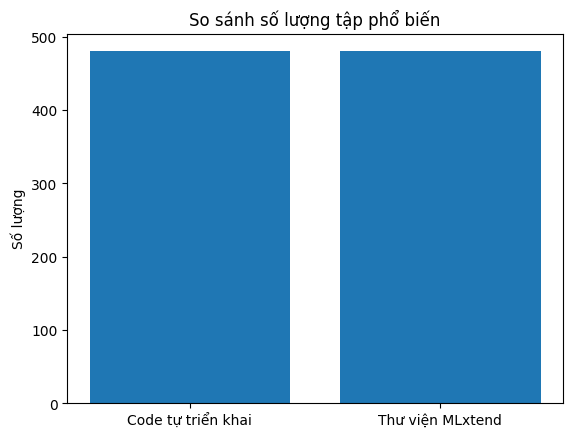

In [107]:
# Ve so do so sanh so luong tap pho bien
import matplotlib.pyplot as plt

plt.bar(["Code tự triển khai", "Thư viện MLxtend"], [len(itemset_supports), len(frequent_itemsets)])

plt.title("So sánh số lượng tập phổ biến")
plt.ylabel("Số lượng")
plt.show()

In [ ]:
# in các tập phổ biến vào file excel với 4 cột là thứ tự, tập phổ biến, support của code tự triển khai và support của thư viện
data = []
for i, (itemset, support) in enumerate(itemset_supports.items()):
    data.append([i+1, list(itemset), support, frequent_itemsets[frequent_itemsets['itemsets'] == itemset]['support'].values[0]])

df = pd.DataFrame(data, columns=["STT", "Tập phổ biến", "Support (Code tự triển khai)", "Support (Thư viện)"])
df.to_excel("frequent_itemsets.xlsx", index=False)

Running Time

In [109]:
print("Thời gian chạy của thuật toán tự tạo: ", end - start)
print("Thời gian chạy của thuật toán thư viện mlxtend: ", library_end - library_start)

Thời gian chạy của thuật toán tự tạo:  8.339464902877808
Thời gian chạy của thuật toán thư viện mlxtend:  0.05781841278076172


Text(0.5, 1.0, 'So sánh thời gian chạy')

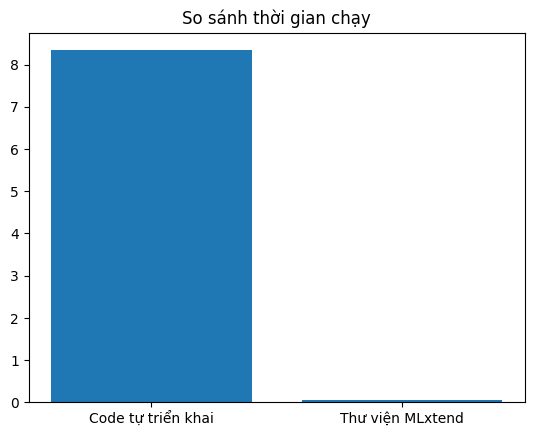

In [110]:
# Ve so do so sanh thoi gian chay
plt.bar(["Code tự triển khai", "Thư viện MLxtend"], [end - start, library_end - library_start])

plt.title("So sánh thời gian chạy")